In [1]:
import kagglehub
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random


In [2]:
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')
print(os.listdir(dataset))

['animals', 'images']


In [3]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [4]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [5]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [6]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

In [ ]:
train_data = [] #A list for store processed img


for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)


    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (150, 150))
        train_data.append([img_gray, label])

The program organizes the training data by handling images from various categories, like 'dogs', 'cats', and 'pandas'. It begins by creating an empty list called `train_data`, which will store both the images and their corresponding labels. For each category, it finds the folder's path, grabs all the image filenames, and shuffles them to add some randomness. Then, it picks the first 100 images from the shuffled list.

Each of these selected images is read, converted into grayscale (removing color), and resized to 100x100 pixels. After that, the image is paired with its label (which comes from its category) and added to the `train_data` list. In the end, 300 images (100 from each category) are processed and ready for training the model.


### **the code shuffles the `train_data` list and then prints the labels of the first 10 images after the shuffle, showing the class labels of those images.**

In [8]:
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[1, 0, 1, 1, 2, 2, 0, 2, 1, 2]


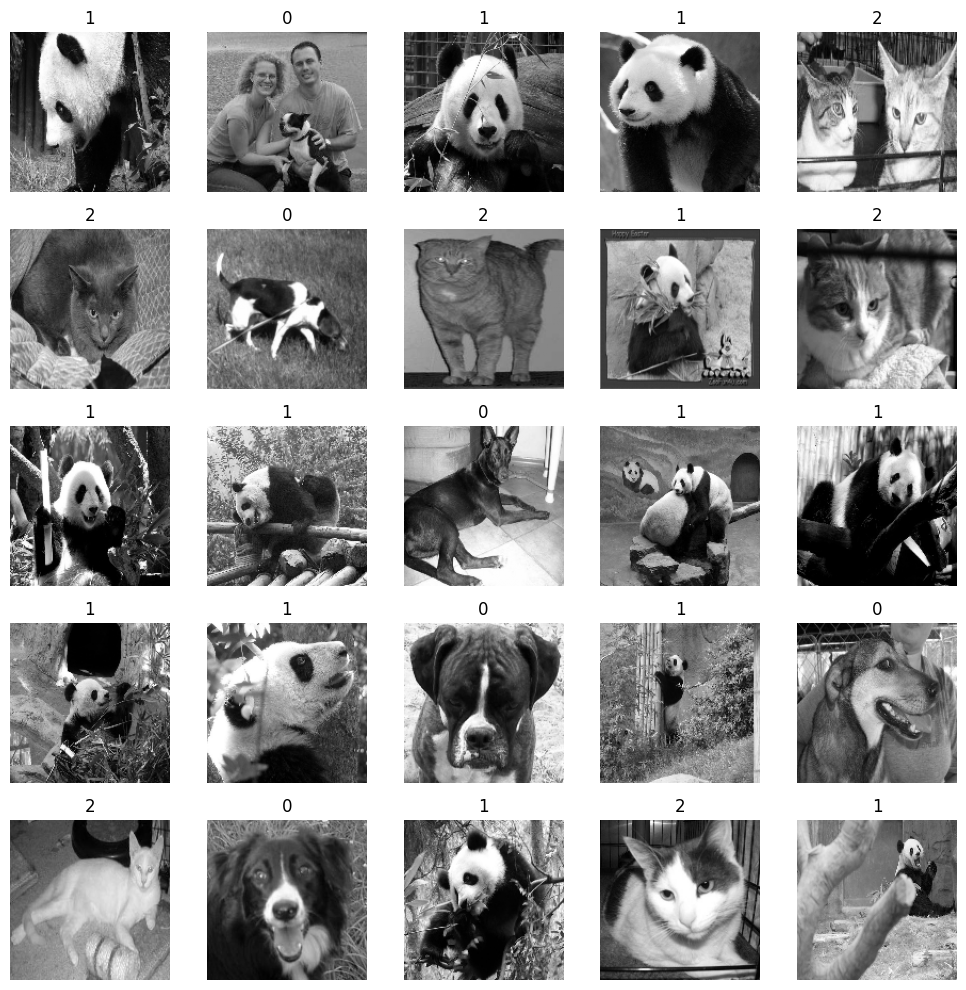

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
  if i < len(train_data):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

Displays a group of images from the dataset, each with its corresponding label (representing the type of animal: dog, cat, or panda). It uses Matplotlib to show the images in a grid, with each image shown in grayscale. The images are displayed in their original grayscale form, and their labels (0, 1, or 2) are assigned based on the animal type for each image.

The code loops through the dataset (`train_data`), plotting each image in a grid format with the appropriate label as the title of each image. The `ax.set_title(label)` function sets the title of each subplot to show the label for the animal, allowing us to see which animal each image represents. The images belong to different animal categories—dogs, cats, and pandas—labeled as
"0" for dogs,
"1" for cats,
"2" for pandas.
This type of data visualization helps us better understand how the model interprets the images and associates each one with its corresponding class.


**the train_data is being divided into 5 folds for cross-validation**

In [10]:
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)

5

**Iterate through each fold, extract labels, and print the fold number and its labels**

In [11]:
for fold_index in range(len(folds)):
    fold = folds[fold_index]  # Get the current fold
    labels = [label for _, label in fold]  # Extract labels from the fold
    print(f"Fold {fold_index + 1}:")  # Print the current fold number
    print(f"Labels: {labels}")  # Print the labels of the current fold

Fold 1:
Labels: [1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1]
Fold 2:
Labels: [0, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1]
Fold 3:
Labels: [1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2]
Fold 4:
Labels: [1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1]
Fold 5:
Labels: [2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 0]


In [12]:
def l2_distance(valid_img, train_img):
    difference = valid_img - train_img  # Calculate element-wise difference
    squared_difference = np.square(difference)  # Square the differences
    summed_squares = np.sum(squared_difference)  # Sum all squared differences
    distance = np.sqrt(summed_squares)  # Take the square root to get Euclidean distance
    return distance

def l1_distance(valid_img, train_img):
    difference = np.abs(valid_img - train_img)  # Calculate element-wise absolute difference
    distance = np.sum(difference)  # Sum all absolute differences to get Manhattan distance
    return distance


In [13]:
from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(distances, k=1):
    # Get the k nearest neighbors based on the provided distances
    nearest_neighbors = distances[:k]

    # Extract the labels of the nearest neighbors
    labels = [label for _, label in nearest_neighbors]

    # Count the occurrences of each label using Counter
    label_counts = Counter(labels)

    # Get the most common label (the one that appears most frequently among the nearest neighbors)
    most_common_label = label_counts.most_common(1)[0][0]

    # Return the most common label as the predicted label
    return most_common_label


Accuracy calculate

Add blockquote

In [14]:
fold_accuracies_2 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_2 = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_2.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")
    print(f"  Fold Accuracies: {accuracies}")



K = 1:
  Average Accuracy: 0.48
  Fold Accuracies: [0.3333333333333333, 0.5333333333333333, 0.43333333333333335, 0.5833333333333334, 0.5333333333333333]

K = 2:
  Average Accuracy: 0.48
  Fold Accuracies: [0.3333333333333333, 0.5333333333333333, 0.43333333333333335, 0.5833333333333334, 0.5333333333333333]

K = 3:
  Average Accuracy: 0.51
  Fold Accuracies: [0.5, 0.5, 0.4166666666666667, 0.6166666666666667, 0.5333333333333333]

K = 4:
  Average Accuracy: 0.53
  Fold Accuracies: [0.48333333333333334, 0.55, 0.4666666666666667, 0.5666666666666667, 0.5666666666666667]

K = 5:
  Average Accuracy: 0.51
  Fold Accuracies: [0.5166666666666667, 0.5333333333333333, 0.43333333333333335, 0.5833333333333334, 0.5]

K = 6:
  Average Accuracy: 0.50
  Fold Accuracies: [0.48333333333333334, 0.55, 0.4666666666666667, 0.55, 0.4666666666666667]

K = 7:
  Average Accuracy: 0.52
  Fold Accuracies: [0.5, 0.5333333333333333, 0.5, 0.5666666666666667, 0.5]

K = 8:
  Average Accuracy: 0.54
  Fold Accuracies: [0.5

In [15]:
fold_accuracies_1 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_1 = []  # List to store average accuracy for each value of k
# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L1 distances between the validation image and all training images
            l1_distances = [
                (l1_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l1_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l1_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_1.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_1.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"K = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")
    print(f"  Fold Accuracies: {accuracies}")

K = 1:
  Average Accuracy: 0.43
  Fold Accuracies: [0.36666666666666664, 0.45, 0.43333333333333335, 0.4166666666666667, 0.5]
K = 2:
  Average Accuracy: 0.43
  Fold Accuracies: [0.36666666666666664, 0.45, 0.43333333333333335, 0.4166666666666667, 0.5]
K = 3:
  Average Accuracy: 0.42
  Fold Accuracies: [0.35, 0.4666666666666667, 0.4166666666666667, 0.38333333333333336, 0.5]
K = 4:
  Average Accuracy: 0.41
  Fold Accuracies: [0.4166666666666667, 0.38333333333333336, 0.43333333333333335, 0.4, 0.43333333333333335]
K = 5:
  Average Accuracy: 0.40
  Fold Accuracies: [0.4, 0.45, 0.38333333333333336, 0.35, 0.4166666666666667]
K = 6:
  Average Accuracy: 0.38
  Fold Accuracies: [0.31666666666666665, 0.38333333333333336, 0.4, 0.4, 0.4]
K = 7:
  Average Accuracy: 0.44
  Fold Accuracies: [0.35, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.45]
K = 8:
  Average Accuracy: 0.41
  Fold Accuracies: [0.3, 0.45, 0.4166666666666667, 0.4166666666666667, 0.45]
K = 9:
  Average Accuracy: 0.40
  

In [16]:
print(len(fold_accuracies_1), len(fold_accuracies_2))

30 30


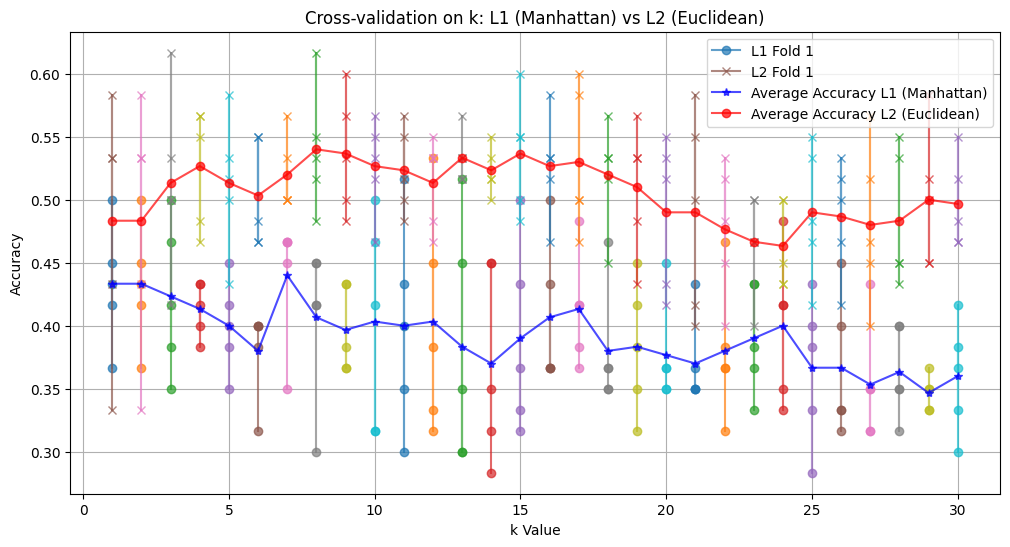

In [21]:
plt.figure(figsize=(12, 6))

# Assuming fold_accuracies_l1 and fold_accuracies_l2 store accuracies for L1 and L2 distances respectively
# And avg_accuracies_l1 and avg_accuracies_l2 store the average accuracies for L1 and L2 distances

colors = plt.cm.tab10.colors

# Loop to plot individual fold accuracies for both L1 (Manhattan) and L2 (Euclidean)
for k in range(30):
    # Plot L1 (Manhattan) fold accuracies
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    # Plot L2 (Euclidean) fold accuracies
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracies for L1 and L2 distances
plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='*')
plt.plot(range(1, 31), avg_accuracies_2, color='red', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')

# Labels and title
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


The graph depicts the behavior of the k-NN model with different values of k for Manhattan (L1) and Euclidean (L2) distances. The main points are:

Varying performance: As both distance measures have varying accuracy at different k values, especially at low k (e.g., k=5–15), it is possible that these variations are due to the sensitivity of the model to local data patterns, outliers, or the behavior of L1 and L2 with regards to feature scaling. For example, L1 may fit sparse and noised data better, whereas L2 may destabilize if there is no feature normalization.

Optimal k Values: The middle-range k values (k=5–15, for example) probably define the "sweet spot" for finding a balance between bias and variance. Manhattan (L1) distance exhibits higher average accuracy than Euclidean (L2), indicating better generalizability in this interval. Yet, at high k (for example, k=25), the difference closes, and both measures plateau, reflecting diminishing returns with more neighbors.

Model Stability: We observe from the vertical lines (spread across folds) that L1 has less variable ranges at K-optimal values, suggesting higher consistency among data splits. For L2, we see slightly larger variability, specifically at low k, which could represent its sensitivity to feature scaling and outliers.

Variation Across 5 Folds: Broader vertical lines for L2 at specific k values, say k=5, reflect greater reliance on data partitioning, i.e., its performance is less stable under different training/test splits. L1's narrower spreads reflect better performance, even if the dataset is re-shuffled.

Selecting the Proper Distance Measure

Manhattan (L1) is better due to its better average accuracy within the best k value range of k=5–15 and its higher stability across cross-validation runs. It is suitable for datasets with unnormalized attributes, high dimensionality, or outliers. Euclidean (L2) stays competitive at high values of k and might do even better if the data is normalized or has smooth geometrical relationships.

Final Recommendation: Choose L1 (Manhattan) for its strength and better average accuracy in the key k range. In case computational efficiency is important (e.g., high-dimensional data), L1 is even faster. Choose L2 if the data is normalized and the geometry of the distances fits well with the problem formulation.